In [46]:
from rawkit.raw import Raw
from rawkit.options import WhiteBalance
import numpy as np
from mpldatacursor import datacursor
from scipy import ndimage
import warnings,glob
from PIL import Image
import scipy
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib nbagg
    import matplotlib.pyplot as plt
    import matplotlib

In [47]:
with Raw(filename='/Users/rein/Desktop/dark.cr2') as raw:
    dark, cdesc = raw.bayer_data(include_margin=False)
with Raw(filename='/Users/rein/Desktop/flat.cr2') as raw:
    flat, cdesc = raw.bayer_data(include_margin=False)
with Raw(filename='/Users/rein/Desktop/frame.cr2') as raw:
    frame, cdesc = raw.bayer_data(include_margin=False)

/Users/rein/git/rebound/venv/lib/python3.5/site-packages/rawkit/raw.py:269: UserWarning: The image is flipped.
  "The image is flipped."


In [48]:
dark = np.array(dark)
flat = np.array(flat)
frame = np.array(frame)

In [49]:
c = (frame-dark)/(flat-dark)

/Users/rein/git/rebound/venv/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [67]:
c1 = c[0::2,0::2] 

In [52]:
c1 = framej[:,:,0]

In [68]:
scipy.misc.toimage(c1,cmin=np.percentile(c1,0.1),cmax=np.percentile(c1,99.9)).save('stacked.jpg')

In [26]:
cdesc

[['R', 'G'], ['G', 'B']]

<IPython.core.display.Javascript object>


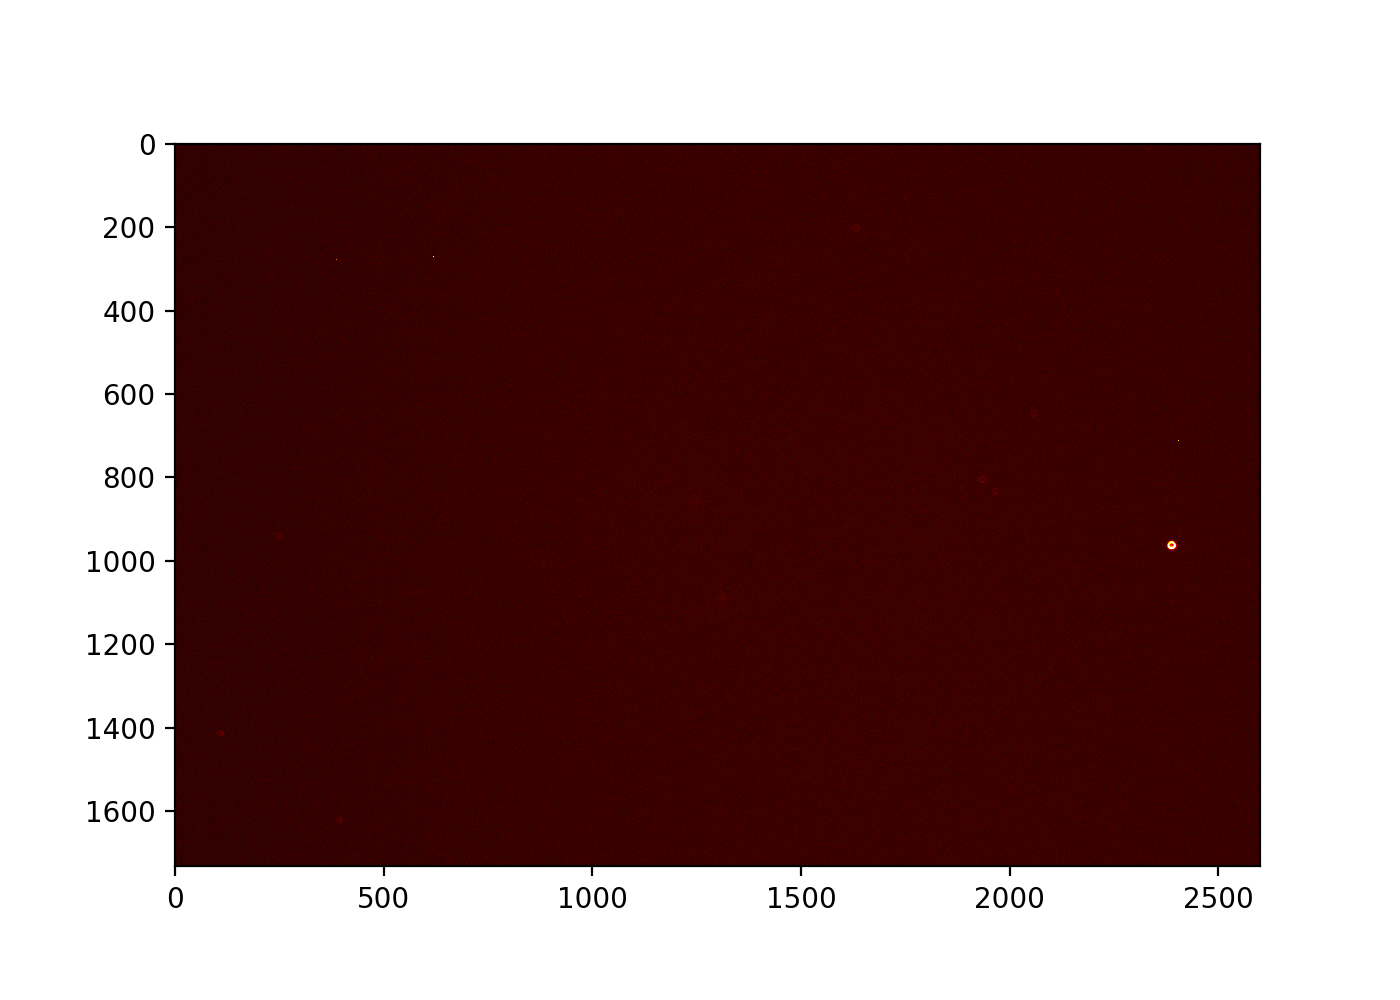

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(frame[::2,::2], cmap="hot")

<IPython.core.display.Javascript object>


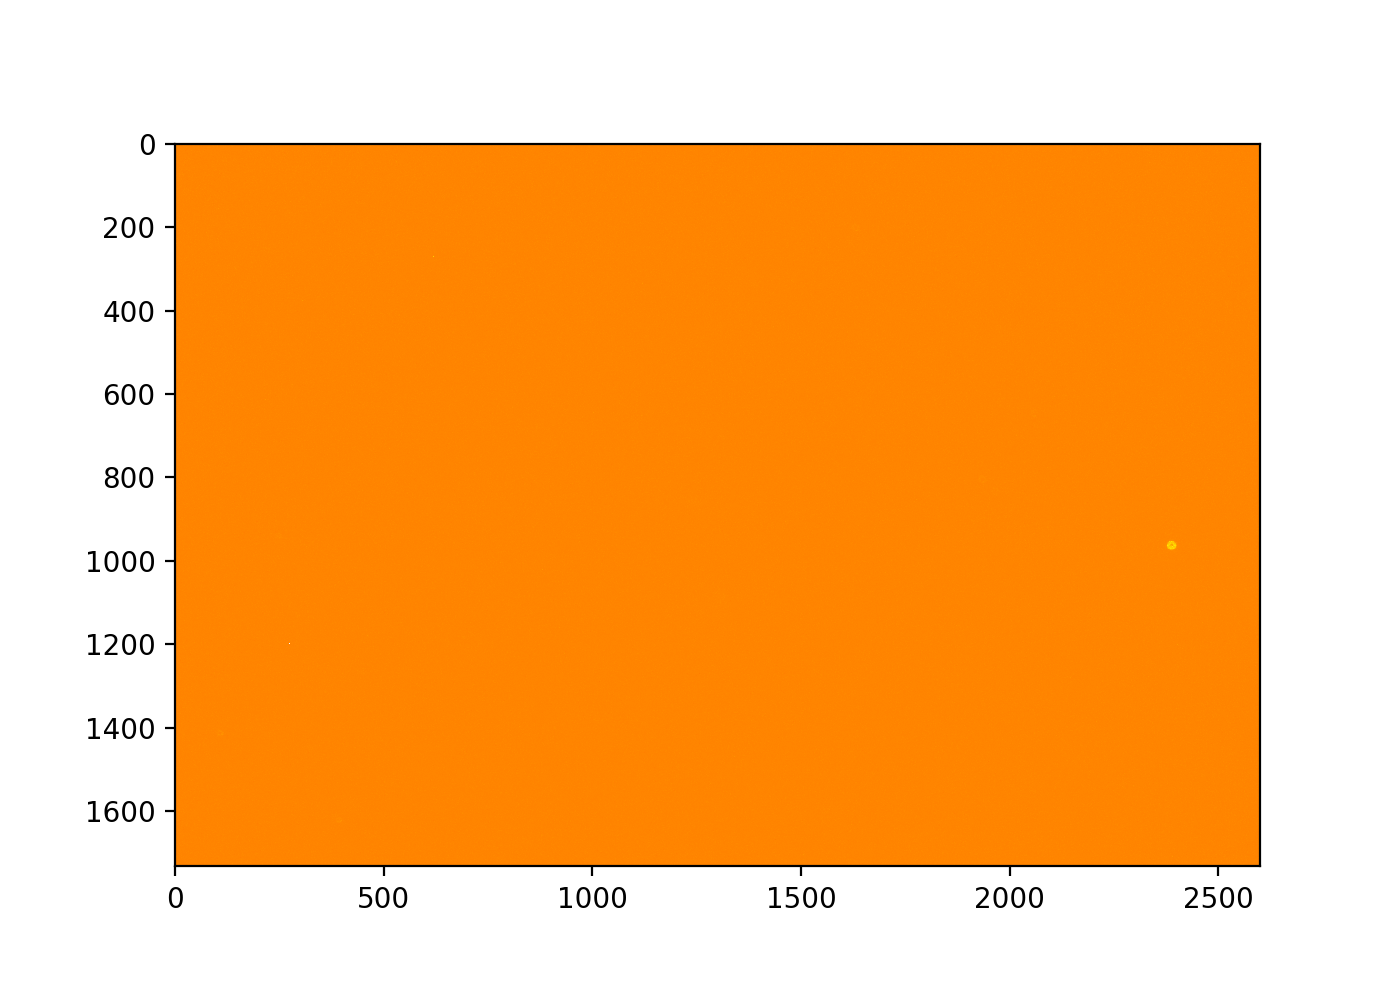

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(c[::2,1::2], cmap="hot")

In [42]:
framej = np.array(Image.open("/Users/rein/Desktop/frame.jpg"), dtype=np.float32)

In [43]:
framej[0][0]

array([ 164.,   93.,   89.], dtype=float32)